In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#data = pd.read_excel("ByteCrunchRound2_ISBAdvaita20221.xlsx")
#data.to_pickle("pre-diwali-pickled")

In [3]:
df = pd.read_pickle("pre-diwali-pickled")
df.head()

,DATE,SHOP_ID,PINCODE,SHOP,ITEM_ID,HR of the day,ORDERS,QTY,ITEM_GMV,CATEGORY
0,2019-10-17,132734.0,401255.0,vaibhav Cell phones,41440860.0,441.0,1.0,1.0,1000.0,Charger
1,2019-10-12,179292.0,400079.0,Ganpati Cell phones,40191841.0,357.0,1.0,2.0,1200.0,Mobiles
2,2019-10-17,192693.0,400068.0,ADARSH LAPTOP Shop,41574322.0,315.0,1.0,1.0,1000.0,Earphones
3,2019-10-10,153638.0,400658.0,Madan JI Repair,36868884.0,210.0,1.0,1.0,3600.0,Earphones
4,2019-10-10,82759.0,400105.0,SHRI SANGEETHAS,37385563.0,399.0,1.0,1.0,800.0,Mobiles


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187678 entries, 0 to 187677
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DATE           187677 non-null  datetime64[ns]
 1   SHOP_ID        187677 non-null  float64       
 2   PINCODE        187677 non-null  float64       
 3   SHOP           187677 non-null  object        
 4   ITEM_ID        187677 non-null  float64       
 5   HR of the day  187677 non-null  float64       
 6   ORDERS         187677 non-null  float64       
 7   QTY            187677 non-null  float64       
 8   ITEM_GMV       187678 non-null  float64       
 9   CATEGORY       187677 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 14.3+ MB


In [5]:
df[df['DATE'].isnull()]

,DATE,SHOP_ID,PINCODE,SHOP,ITEM_ID,HR of the day,ORDERS,QTY,ITEM_GMV,CATEGORY
187677,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.093254e+08,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
tot_ord = df['ORDERS'].sum()
tot_gmv = df['ITEM_GMV'].sum()

print("Total orders: %d" % int(tot_ord))
print("Total GMV is: %f crores" % (tot_gmv/10000000))

Total orders: 241585
Total GMV is: 30.932545 crores


In [8]:
loc = ['PINCODE','SHOP_ID','SHOP']

for i in loc:
    val = df[i].nunique()
    print("{} has {} unique values".format(i,val))

PINCODE has 259 unique values
SHOP_ID has 1097 unique values
SHOP has 965 unique values


In [9]:
df['CATEGORY'].value_counts()

Mobiles      83759
Earphones    53892
Tablets      27400
Speakers      7310
Laptops       5654
TV            5311
Charger       4351
Name: CATEGORY, dtype: int64

In [10]:
df.head()

,DATE,SHOP_ID,PINCODE,SHOP,ITEM_ID,HR of the day,ORDERS,QTY,ITEM_GMV,CATEGORY
0,2019-10-17,132734.0,401255.0,vaibhav Cell phones,41440860.0,441.0,1.0,1.0,1000.0,Charger
1,2019-10-12,179292.0,400079.0,Ganpati Cell phones,40191841.0,357.0,1.0,2.0,1200.0,Mobiles
2,2019-10-17,192693.0,400068.0,ADARSH LAPTOP Shop,41574322.0,315.0,1.0,1.0,1000.0,Earphones
3,2019-10-10,153638.0,400658.0,Madan JI Repair,36868884.0,210.0,1.0,1.0,3600.0,Earphones
4,2019-10-10,82759.0,400105.0,SHRI SANGEETHAS,37385563.0,399.0,1.0,1.0,800.0,Mobiles


## Date wise comparison

In [11]:
by_date = df.groupby('DATE').sum()[['ORDERS','ITEM_GMV']]
by_date['ITEM_GMV (crores)'] = np.round(by_date['ITEM_GMV']/10000000,decimals=3)
by_date['% TOT ORD'] = np.round(by_date['ORDERS']/2415.85,decimals=2)
by_date['% TOT GMV'] = np.round(by_date['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=2)
by_date.drop(['ORDERS','ITEM_GMV'],axis=1)

,ITEM_GMV (crores),% TOT ORD,% TOT GMV
DATE,,,
2019-10-10,3.470,11.52,11.22
2019-10-11,3.353,11.16,10.84
2019-10-12,3.997,13.25,12.92
2019-10-13,4.744,16.01,15.34
2019-10-14,3.036,9.87,9.81
2019-10-15,3.433,11.06,11.10
2019-10-16,3.796,11.89,12.27
2019-10-17,5.103,15.23,16.50


## Category wise comparison

In [12]:
by_cat = df.groupby('CATEGORY').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_cat['ITEM_GMV (crores)'] = np.round(by_cat['ITEM_GMV']/10000000,decimals=3)
by_cat['% Total ORD'] = np.round(by_cat['ORDERS']/3634.45,decimals=3)
by_cat['% TOT GMV'] = np.round(by_cat['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=6)
by_cat.drop(['ORDERS','ITEM_GMV'],axis=1)

,ITEM_GMV (crores),% Total ORD,% TOT GMV
CATEGORY,,,
Mobiles,11.331,29.182,36.631727
Earphones,11.018,19.818,35.620270
Tablets,4.520,9.349,14.613694
Speakers,1.326,2.526,4.285744
Laptops,1.188,2.048,3.841069
TV,0.833,1.974,2.693782
Charger,0.716,1.575,2.313715


<AxesSubplot:ylabel='% TOT GMV'>

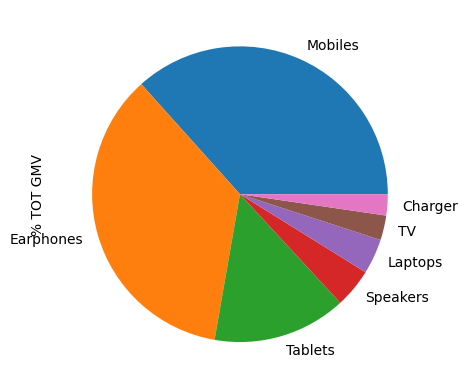

In [13]:
by_cat.plot(kind='pie',y='% TOT GMV',legend=False)

In [14]:
#by_cat.plot(kind='pie',y='% TOT ORD',legend=False)

## Shop wise comparison

In [15]:
by_shop = df.groupby('SHOP').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_shop['% TOT ORD'] = np.round(by_shop['ORDERS']/2415.85,decimals=2)
by_shop['% TOT GMV'] = np.round(by_shop['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=6)
by_shop['GMV CUM'] = np.round(by_shop['% TOT GMV'].cumsum(axis=0),decimals=3)
by_shop.head()

,ORDERS,ITEM_GMV,% TOT ORD,% TOT GMV,GMV CUM
SHOP,,,,,
Samsung & Apple's,5968.0,1.158309e+07,2.47,3.744630,3.745
SS ELECTRONICS(Tripolis),4964.0,1.145388e+07,2.05,3.702857,7.447
Kiranshree Cell phones & Speakers,5207.0,8.168113e+06,2.16,2.640621,10.088
Manohar ELECTRONICS and Tablets,5285.0,7.026187e+06,2.19,2.271455,12.360
Indian's Cell phones,4700.0,6.195390e+06,1.95,2.002871,14.362


In [16]:
by_shop[by_shop['GMV CUM']<25].drop(['ORDERS','ITEM_GMV'],axis=1)

,% TOT ORD,% TOT GMV,GMV CUM
SHOP,,,
Samsung & Apple's,2.47,3.744630,3.745
SS ELECTRONICS(Tripolis),2.05,3.702857,7.447
Kiranshree Cell phones & Speakers,2.16,2.640621,10.088
Manohar ELECTRONICS and Tablets,2.19,2.271455,12.360
Indian's Cell phones,1.95,2.002871,14.362
SHRI SANGEETAS,2.23,1.914883,16.277
Kaveri - Lalpur,1.13,1.686088,17.963
Kipps Cell phones (Rajendra Nagar),1.29,1.622170,19.586
Pathak Tablets,1.27,1.585999,21.172


## Location wise comparison

In [17]:
by_pin = df.groupby('PINCODE').sum()[['ORDERS','ITEM_GMV']].sort_values(['ITEM_GMV'],ascending=False)
by_pin['% TOT ORD'] = np.round(by_pin['ORDERS']/2415.85,decimals=3)
by_pin['% TOT GMV'] = np.round(by_pin['ITEM_GMV']*100/df['ITEM_GMV'].sum(),decimals=6)
by_pin['GMV CUM'] = np.round(by_pin['% TOT GMV'].cumsum(axis=0),decimals=3)
by_pin.head()

,ORDERS,ITEM_GMV,% TOT ORD,% TOT GMV,GMV CUM
PINCODE,,,,,
400058.0,30183.0,3.334286e+07,12.494,10.779218,10.779
400102.0,12838.0,1.956941e+07,5.314,6.326479,17.106
400120.0,10875.0,1.902334e+07,4.502,6.149943,23.256
400131.0,8917.0,1.214173e+07,3.691,3.925229,27.181
400091.0,10833.0,1.056979e+07,4.484,3.417046,30.598


In [18]:
by_pin[by_pin['GMV CUM']<51].drop(['ORDERS','ITEM_GMV'],axis=1)

,% TOT ORD,% TOT GMV,GMV CUM
PINCODE,,,
400058.0,12.494,10.779218,10.779
400102.0,5.314,6.326479,17.106
400120.0,4.502,6.149943,23.256
400131.0,3.691,3.925229,27.181
400091.0,4.484,3.417046,30.598
400105.0,3.735,3.303433,33.901
400122.0,2.568,3.056640,36.958
400118.0,2.706,2.874353,39.832
400052.0,2.309,2.526614,42.359


In [19]:
df['PINCODE'].describe()

count    187677.000000
mean     402068.247041
std        5451.196738
min      400049.000000
25%      400080.000000
50%      400118.000000
75%      400144.000000
max      421653.000000
Name: PINCODE, dtype: float64

In [20]:
#post_data = pd.read_excel("ByteCrunchRound2_ISBAdvaita20221.xlsx",sheet_name=1)
#post_data.head()

In [21]:
#post_data.to_pickle("post-diwali-pickled")
#post_df = pd.read_pickle("post-diwali-pickled")
#post_df.head()

## Category sales across dates

In [22]:
# Calculating category wise GMV percentage for each row
PCT_TOT_GMV = []

Charger = df.groupby('CATEGORY').sum().loc['Charger']['ITEM_GMV']
Mobiles = df.groupby('CATEGORY').sum().loc['Mobiles']['ITEM_GMV']
Earphones = df.groupby('CATEGORY').sum().loc['Earphones']['ITEM_GMV']
Laptops = df.groupby('CATEGORY').sum().loc['Laptops']['ITEM_GMV']
Tablets = df.groupby('CATEGORY').sum().loc['Tablets']['ITEM_GMV']
Speakers = df.groupby('CATEGORY').sum().loc['Speakers']['ITEM_GMV']
TV = df.groupby('CATEGORY').sum().loc['TV']['ITEM_GMV']

for i in range(df['ORDERS'].size):
    val = 0
    if df['CATEGORY'][i]=='Mobiles':
        val=Mobiles
    elif df['CATEGORY'][i]=='Earphones':
        val=Earphones
    elif df['CATEGORY'][i]=='Tablets':
        val=Tablets
    elif df['CATEGORY'][i]=='Speakers':
        val=Speakers
    elif df['CATEGORY'][i]=='Laptops':
        val=Laptops
    elif df['CATEGORY'][i]=='TV':
        val=TV
    else :
        val=Charger        
    PCT_TOT_GMV.append(val)

# making a column for category wise GMV percentage
df['% CAT GMV'] = np.round((df['ITEM_GMV']*100)/PCT_TOT_GMV,decimals=6)

In [23]:
df.groupby(['CATEGORY','DATE']).sum()[['% CAT GMV']]

% CAT GMV
CATEGORY  DATE                 
Charger   2019-10-10  12.725371
          2019-10-11  12.643136
          2019-10-12  15.125126
          2019-10-13  16.414581
          2019-10-14   9.544095
          2019-10-15  10.761886
          2019-10-16  11.130534
          2019-10-17  11.655623
Earphones 2019-10-10  10.679448
          2019-10-11  10.608910
          2019-10-12  12.246572
          2019-10-13  14.176917
          2019-10-14   9.234260
          2019-10-15  10.655558
          2019-10-16  12.519829
          2019-10-17  19.879252
Laptops   2019-10-10  10.134759
          2019-10-11   9.121864
          2019-10-12  11.565503
          2019-10-13  14.103031
          2019-10-14   8.792218
          2019-10-15  10.719551
          2019-10-16  16.261242
          2019-10-17  19.302015
Mobiles   2019-10-10  11.407812
          2019-10-11  11.107511
          2019-10-12  13.375379
          2019-10-13  16.167354
          2019-10-14  10.279580
          2019-10-15  11.486067
          2019-10-16  12.084135
          2019-10-17  14.097489
Speakers  2019-10-10  11.146188
          2019-10-11  11.591148
          2019-10-12  13.251720
          2019-10-13  15.199073
          2019-10-14   9.545578
          2019-10-15  10.489373
          2019-10-16  10.937877
          2019-10-17  17.838951
TV        2019-10-10  11.740119
          2019-10-11  10.832021
          2019-10-12  12.508312
          2019-10-13  14.263339
          2019-10-14  10.031385
          2019-10-15  10.920358
          2019-10-16  13.019811
          2019-10-17  16.684600
Tablets   2019-10-10  12.035676
          2019-10-11  10.687704
          2019-10-12  13.429451
          2019-10-13  16.471218
          2019-10-14  10.414915
          2019-10-15  11.575530
          2019-10-16  11.514379
          2019-10-17  13.871084